In [1]:
from fastai.vision.all import *
import albumentations as A
from natsort import natsorted
import os, sys, gc, cv2, yaml

sys.path.append(os.path.abspath('..'))
from utils.preprocess_utils import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations


#### 1. Set the path to folder containing Dataset (PID Images + Yolo Annotations)

In [4]:
dataset_dir = Path('../data/sample_dataset/original/') # directory containing PID sheets and annotations in YOLO format

#### 2. Create overlapping patches from full-sized PIDs

<img src="../media/overlapping_patches.png" alt="Overlapping_patches" style="width:800px;"/>


In [3]:
make_patches_w_overlap(dataset_dir, overlap=0.10, sz=1024) 

Processed patches for image: 0.jpg
Processed patches for image: 1.jpg
********* All patches created successfully *************


#### 3. Create random patches from full-sized PIDs (Optional)

In [5]:
make_random_patches_per_sheet(dataset_dir, sz=1024, n=5) # 5 random patches per sheet

Processed 5 patches for image: 0.jpg
Processed 5 patches for image: 1.jpg
********* Random patches creation completed successfully *************


#### 4. Visualize created patches and their annotations (as a check - Optional)

<Figure size 1500x500 with 0 Axes>

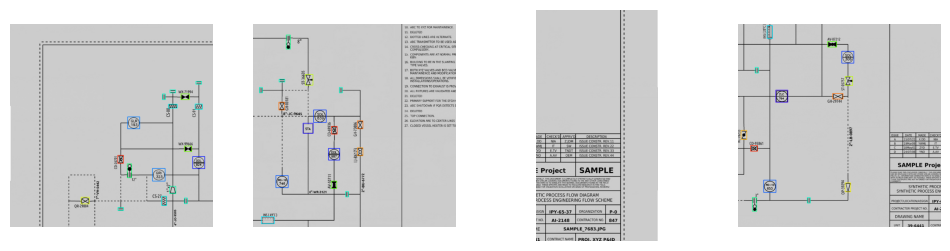

In [4]:
crops_dir = Path('../data/sample_dataset/patches_class_aware/')
plot_ims_labels_grid(crops_dir, n=4, num_classes=42)